In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 

In [2]:
def reward_fcn(d, Rmax, dmax, d_val_1, select_fcn='distance_exponential'):
    
    if d >= dmax :
        Rt = -5*Rmax
        return Rt
    
    if select_fcn == 'distance_exponential':
        
        alpha = d_val_1/(-np.log(1.0/Rmax))
        
        Rt = Rmax*np.exp(-(d/alpha))
        
    elif select_fcn == 'distance_linear':
        
        if d < 1:
            Rt = Rmax
        
        elif d >= d_val_1 and d < dmax :
            Rt = (-1.0/(dmax-d_val_1))*d + dmax/(dmax-d_val_1)
            
        elif d >= 1 and d < d_val_1:
            Rt = (1-Rmax)*d/float(d_val_1-1) + (Rmax-1)/float(d_val_1-1) + Rmax
            
    return Rt    


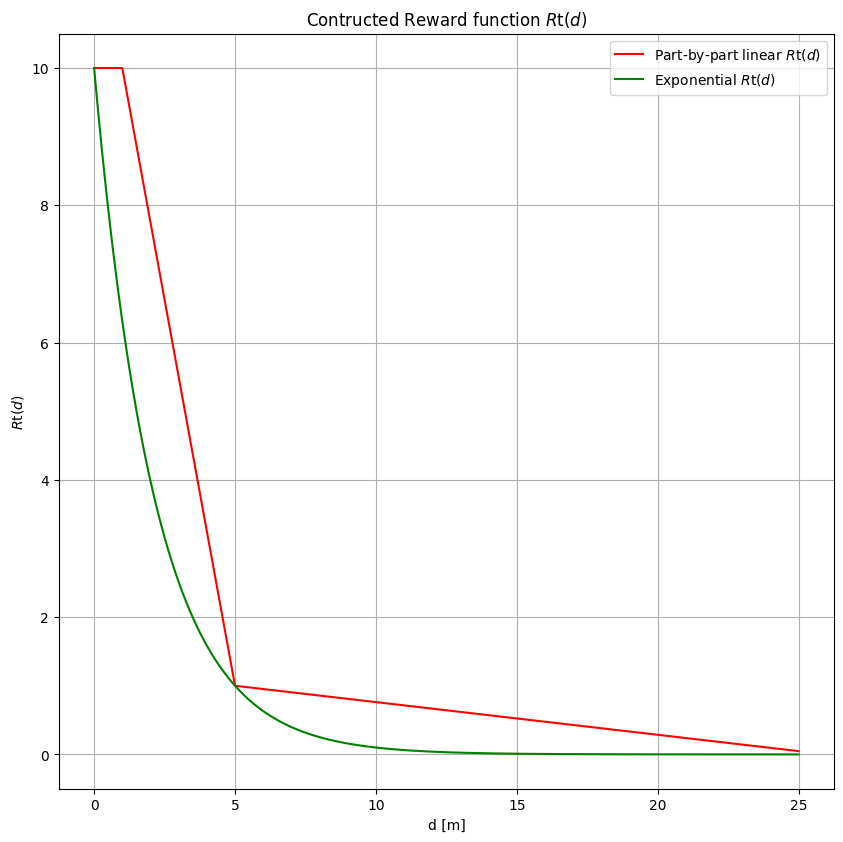

In [6]:
Rmax = 10
dmax = 26
num_points = 1000

d = np.linspace(0,25,num_points)

reward_dict = {'distance_linear': ['Part-by-part linear $R\mathrm{t}(d)$','red'],
               'distance_exponential': ['Exponential $R\mathrm{t}(d)$','green']}

all_rewards = list(reward_dict.keys())

Rt = np.zeros((len(all_rewards), num_points))

fig = plt.figure(figsize=(10,10), dpi=100)

for i in range(len(all_rewards)):    
    for j in range(num_points):
        Rt[i,j] = reward_fcn(d[j], Rmax, dmax, 5, select_fcn=all_rewards[i])
        
    plt.plot(d, Rt[i], color=reward_dict[all_rewards[i]][1], linewidth=1.5, label=reward_dict[all_rewards[i]][0])

plt.title('Contructed Reward function $R\mathrm{t}(d)$')
plt.xlabel('d [m]')
plt.ylabel('$R\mathrm{t}(d)$')
plt.legend()
plt.grid()
fig.savefig(os.getcwd()+'/reward_plot.png', facecolor = 'white', bbox_inches='tight')